In [1]:
import numpy as np
import numpy as np
import os
import random
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def get_sample(x, noise=False):
    result = 2*x - 1
    if noise:
        result = result + np.random.normal(0,2)
    return result

def func(x, a, b):
    return a * x + b

In [3]:
def mean_sqaure_error(f, a, b, data):
    estimated = [f(x,a,b) for x,y in data]
    Y = [y for x,y in data]
    diff = np.array(estimated) - np.array(Y)
    sq_error = [d**2 for d in diff]
    return np.sqrt(sum(sq_error) / len(Y))

In [10]:
x_range = np.arange(-5,7,1)
y_random_sampled = [get_sample(i, True) for i in x_range]
samples = list(zip(x_range, y_random_sampled))
print(samples)

[(-5, -9.888424867758252), (-4, -7.947896000791748), (-3, -3.783882427965001), (-2, -10.004888570388083), (-1, -3.7672252577925427), (0, -1.018980226393226), (1, 1.1520436321501002), (2, 2.2504354687342625), (3, 4.149956513943742), (4, 6.635717980012462), (5, 7.736072265384208), (6, 7.048277290125302)]


In [11]:
total_opt, total_cov = curve_fit(func, x_range, y_random_sampled)

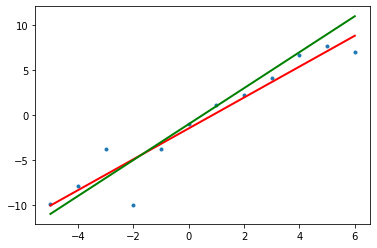

mean square error of line fitting using whole data : 1.8485958930213455


In [12]:
plt.scatter(x_range, y_random_sampled, marker='.')
plt.plot(x_range, func(np.array(x_range), *total_opt), color='red', linewidth=2)
plt.plot(x_range, func(np.array(x_range), 2,-1), color='green', linewidth=2)
plt.show()
print("mean square error of line fitting using whole data : {}".format(mean_sqaure_error(func, *total_opt, samples)))

In [23]:
mse = np.Inf
a,b = 0,0
for i in range(10):
    random.shuffle(samples)
    new_sample = samples[:6]
    xr = [x for x,y in new_sample]
    yr = [y for x,y in new_sample]
    popt, pcov = curve_fit(func, xr, yr)
    new_mse = mean_sqaure_error(func, *popt, new_sample)
    if mse > new_mse:
        a,b = popt
        mse = new_mse
a10, b10 = a, b

mse = np.Inf
a,b = 0,0
for i in range(100):
    random.shuffle(samples)
    new_sample = samples[:6]
    xr = [x for x,y in new_sample]
    yr = [y for x,y in new_sample]
    popt, pcov = curve_fit(func, xr, yr)
    new_mse = mean_sqaure_error(func, *popt, new_sample)
    if mse > new_mse:
        a,b = popt
        mse = new_mse
a100, b100 = a, b

mse = np.Inf
a,b = 0,0
for i in range(100):
    random.shuffle(samples)
    new_sample = samples[:6]
    xr = [x for x,y in new_sample]
    yr = [y for x,y in new_sample]
    popt, pcov = curve_fit(func, xr, yr)
    new_mse = mean_sqaure_error(func, *popt, new_sample)
    if mse > new_mse:
        a,b = popt
        mse = new_mse
a10000, b10000 = a, b



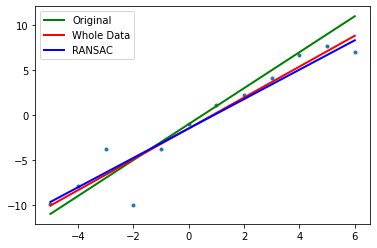

mean square error of line fitting using whole data : 1.8485958930213457
mean square error of line fitting using RANSAC : 0.8371820630313294


In [22]:
plt.scatter(x_range, y_random_sampled, marker='.')
plt.plot(x_range, func(np.array(x_range), 2,-1), color='green', linewidth=2)
plt.plot(x_range, func(np.array(x_range), *total_opt), color='red', linewidth=2)
plt.plot(x_range, func(np.array(x_range), a,b), color='blue', linewidth=2)
plt.legend(['Original', 'Whole Data', 'RANSAC'], loc=2)
plt.show()
print("mean square error of line fitting using whole data : {}".format(mean_sqaure_error(func, *total_opt, samples)))
print("mean square error of line fitting using RANSAC : {}".format(mse))


In [9]:
print(a,b)

2.0639961128078452 -0.1649843467401074


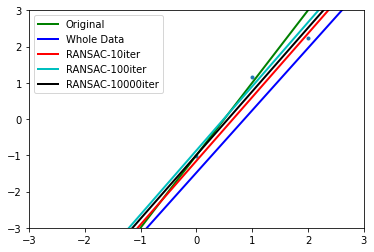

mean square error of line fitting using whole data : 1.8485958930213457
mean square error of line fitting using RANSAC : 0.20194851476190537


In [39]:
plt.scatter(x_range, y_random_sampled, marker='.')
plt.plot(x_range, func(np.array(x_range), 2,-1), color='green', linewidth=2)
plt.plot(x_range, func(np.array(x_range), *total_opt), color='b', linewidth=2)
plt.plot(x_range, func(np.array(x_range), a10,b10), color='r', linewidth=2)
plt.plot(x_range, func(np.array(x_range), a100,b100), color='c', linewidth=2)
plt.plot(x_range, func(np.array(x_range), a10000,b10000), color='k', linewidth=2)
plt.legend(['Original', 'Whole Data', 'RANSAC-10iter', 'RANSAC-100iter', 'RANSAC-10000iter'], loc=2)
plt.ylim(-3,3)
plt.xlim(-3,3)
plt.show()
print("mean square error of line fitting using whole data : {}".format(mean_sqaure_error(func, *total_opt, samples)))
print("mean square error of line fitting using RANSAC : {}".format(mse))